In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import requests
import json

In [2]:
path_to_excel = "Resource/ardd_fatal_crashes_feb2023.xlsx"
fatal_crashes_excel = pd.read_excel(path_to_excel,sheet_name=1)

path_to_csv = "Resource/ardd_fatalities.csv"
fatal_crashes_csv = pd.read_csv(path_to_csv,low_memory=False)

In [3]:
fatal_crashes_csv.drop(fatal_crashes_csv[fatal_crashes_csv['Year']==2023].index,inplace=True)

# Uncleaned Data
fatal_crashes_csv

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
199,20225049,WA,12,2022,Sunday,18:48,Single,No,No,No,...,29,-9,-9,-9,-9,No,No,26_to_39,Weekend,Night
200,20225106,WA,12,2022,Sunday,1:12,Multiple,No,Yes,No,...,24,-9,-9,-9,-9,No,No,17_to_25,Weekend,Night
201,20221150,NSW,12,2022,Friday,22:30,Single,No,No,No,...,19,Inner Regional Australia,Murray,Greater Hume,Access road,No,No,17_to_25,Weekend,Night
202,20223161,Qld,12,2022,Sunday,3:00,Single,No,No,No,...,23,Outer Regional Australia,Cairns,Tablelands (R),National or State Highway,No,No,17_to_25,Weekend,Night
203,20224004,SA,12,2022,Saturday,1:30,Single,No,No,No,...,32,Inner Regional Australia,Adelaide - North,Playford (C),Sub-arterial Road,No,No,26_to_39,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54519,19891246,NSW,1,1989,Wednesday,17:05,Single,Yes,-9,No,...,5,-9,-9,-9,-9,No,No,0_to_16,Weekday,Day
54520,19895088,WA,1,1989,Monday,6:00,Single,No,-9,No,...,19,-9,-9,-9,-9,Yes,No,17_to_25,Weekday,Day
54521,19895088,WA,1,1989,Monday,6:00,Single,No,-9,No,...,17,-9,-9,-9,-9,Yes,No,17_to_25,Weekday,Day
54522,19895088,WA,1,1989,Monday,6:00,Single,No,-9,No,...,17,-9,-9,-9,-9,Yes,No,17_to_25,Weekday,Day


In [4]:
# Create dataframe for each year 

def get_By_Year(y):
    df = fatal_crashes_csv.loc[fatal_crashes_csv['Year'] == y]
    return(df)

df_1989 = get_By_Year(1989)
df_1990 = get_By_Year(1990)
df_1991 = get_By_Year(1991)
df_1992 = get_By_Year(1992)
df_1993 = get_By_Year(1993)
df_1994 = get_By_Year(1994)
df_1995 = get_By_Year(1995)
df_1996 = get_By_Year(1996)
df_1997 = get_By_Year(1997)
df_1998 = get_By_Year(1998)
df_1999 = get_By_Year(1999)
df_2000 = get_By_Year(2000)
df_2001 = get_By_Year(2001)
df_2002 = get_By_Year(2002)
df_2003 = get_By_Year(2003)
df_2004 = get_By_Year(2004)
df_2005 = get_By_Year(2005)
df_2006 = get_By_Year(2006)
df_2007 = get_By_Year(2007)
df_2008 = get_By_Year(2008)
df_2009 = get_By_Year(2009)
df_2010 = get_By_Year(2010)
df_2011 = get_By_Year(2011)
df_2012 = get_By_Year(2012)
df_2013 = get_By_Year(2013)
df_2014 = get_By_Year(2014)
df_2015 = get_By_Year(2015)
df_2016 = get_By_Year(2016)
df_2017 = get_By_Year(2017)
df_2018 = get_By_Year(2018)
df_2019 = get_By_Year(2019)
df_2020 = get_By_Year(2020)
df_2021 = get_By_Year(2021)
df_2022 = get_By_Year(2022)


# Total crashes by state for all 34 years

df_34years_state_crashes = pd.DataFrame({'State':['ACT','NSW','NT','Qld','SA','Tas','Vic','WA'],'Crash':[0,0,0,0,0,0,0,0]}) 

# Function to get by state
def get_crash_by_state(df,for_year):
    temp = df.groupby('State')[['Crash ID']].count()
    temp.rename(columns = {'Crash ID':f'Crash_{for_year}'}, inplace=True)
    global df_34years_state_crashes 
    df_34years_state_crashes = pd.merge(df_34years_state_crashes,temp, on='State')
    return (df_34years_state_crashes)
  

years_34 = {'1989':df_1989,'1990':df_1990,'1991':df_1991,'1992':df_1992,'1993':df_1993,'1994':df_1994,'1995':df_1995,
         '1996':df_1996,'1997':df_1997,'1998':df_1998,'1999':df_1999,'2000':df_2000,'2001':df_2001,'2002':df_2002,
         '2003':df_2003,'2004':df_2004,'2005':df_2005,'2006':df_2006,'2007':df_2007,'2008':df_2008,'2009':df_2009,
         '2010':df_2010,'2011':df_2011,'2012':df_2012,'2013':df_2013,'2014':df_2014,'2015':df_2015,'2016':df_2016,
         '2017':df_2017,'2018':df_2018,'2019':df_2019,'2020':df_2020,'2021':df_2021,'2022':df_2022
        }

for key,value in years_34.items():
    #yrs.append(key)
    get_crash_by_state(value,key)
    
df_34years_state_crashes.drop(df_34years_state_crashes.columns[1],axis=1,inplace=True)
#df_34years_state_crashes




In [5]:
# Show 4 figures in in subplot for 1990,2000,2010,2020

# figure, axis = plt.subplots(2, 2,figsize=(13, 13),facecolor='#e8f4f0')

# for ax in axis.flat:
#     ax.set(xlabel='States', ylabel='Total Crashes')

# axis[0, 0].bar(df_34years_state_crashes['State'],df_34years_state_crashes['Crash_1990'],color='darkslateblue')
# axis[0, 0].set_title("Year 1990")
# axis[0, 0].legend(['Crashes'])


# axis[0, 1].bar(df_34years_state_crashes['State'],df_34years_state_crashes['Crash_2020'],color='khaki')
# axis[0, 1].set_title("Year 2020")
# axis[0, 1].legend(['Crashes'])

# axis[1, 0].bar(df_34years_state_crashes['State'],df_34years_state_crashes['Crash_2010'],color='orange')
# axis[1, 0].set_title("Year 2010")
# axis[1, 0].legend(['Crashes'])


# axis[1, 1].bar(df_34years_state_crashes['State'],df_34years_state_crashes['Crash_2020'],color='cyan')
# axis[1, 1].set_title("Year 2020")
# axis[1, 1].legend(['Crashes'])
# plt.subplots_adjust(top=0.75, bottom=0.10)
# plt.show()


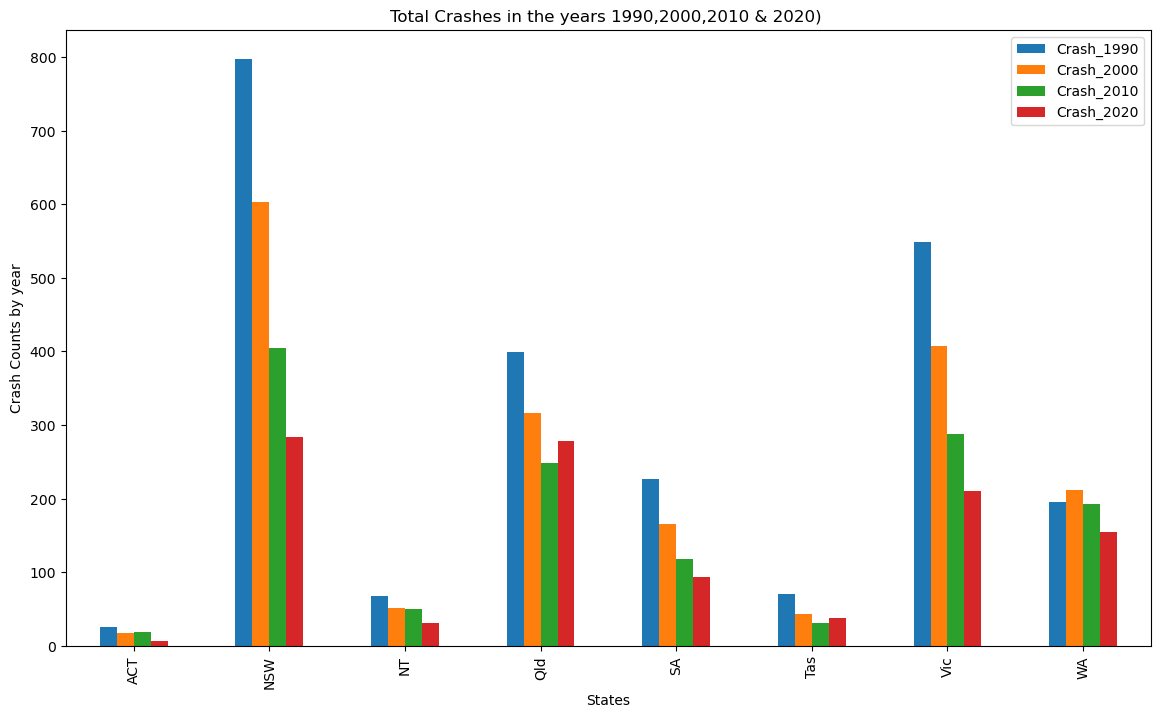

In [6]:
# Crashes happend in 1999,2000,2010,2020 by states

df_34years_state_crashes.plot(x="State",y=['Crash_1990','Crash_2000','Crash_2010','Crash_2020'],kind='bar',figsize=(14,8))
plt.title("Total Crashes in the years 1990,2000,2010 & 2020) ")
plt.xlabel("States")
plt.ylabel("Crash Counts by year")
plt.legend(bbox_to_anchor=(1.0, 1.0),loc="best")
plt.show()


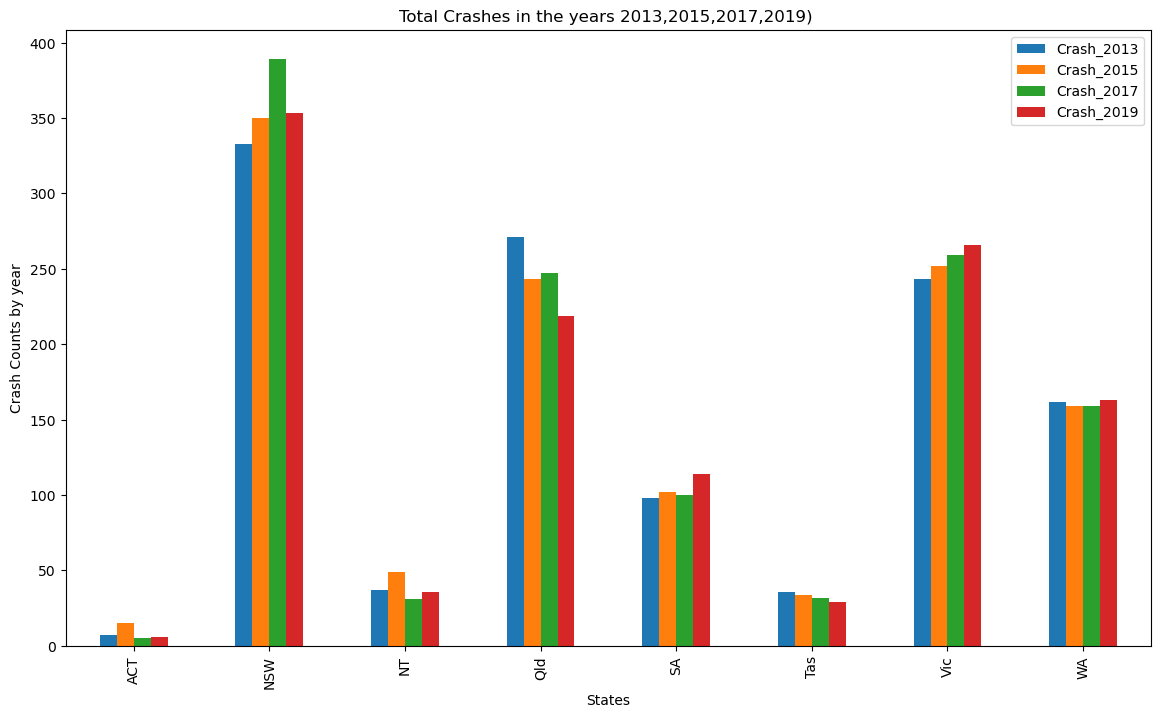

In [7]:
# Crashes happend in 2013,2015,2017,2019 by states

df_34years_state_crashes.plot(x="State",y=['Crash_2013','Crash_2015','Crash_2017','Crash_2019'],kind='bar',figsize=(14,8))
plt.title("Total Crashes in the years 2013,2015,2017,2019) ")
plt.xlabel("States")
plt.ylabel("Crash Counts by year")
plt.legend(bbox_to_anchor=(1.0, 1.0),loc="best")
plt.show()


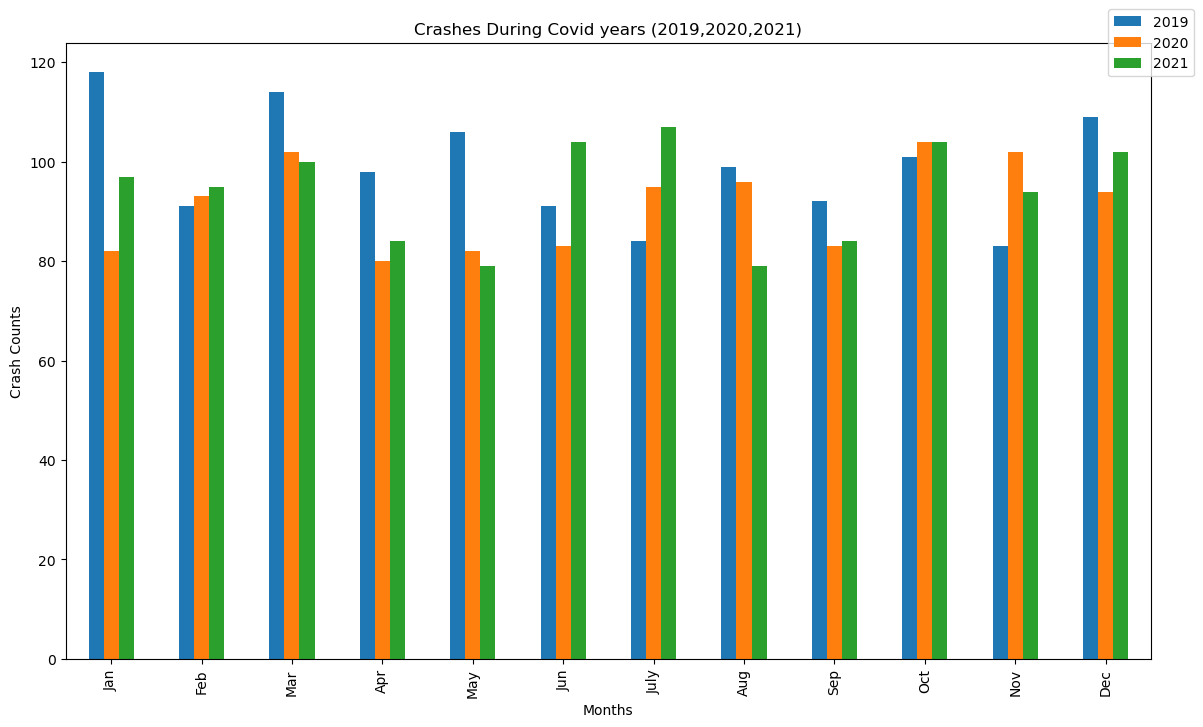

In [8]:
# Total crashes by month for year 2022,2021,2020,2019,2018

months = {"1":"Jan","2":"Feb","3":"Mar","4":"Apr","5":"May","6":"Jun","7":"July",
          "8":"Aug","9":"Sep","10":"Oct","11":"Nov","12":"Dec"}

# For 2022
df_2022_month = df_2022.groupby(['Month'])[['Crash ID']].count()
df_2022_month = df_2022_month.reset_index()
df_2022_month.rename(columns={'Crash ID':'2022'},inplace=True)


# For 2021

df_2021_month = df_2021.groupby(['Month'])[['Crash ID']].count()
df_2021_month = df_2021_month.reset_index()
df_2021_month.rename(columns={'Crash ID':'2021'},inplace=True)


# For 2020

df_2020_month = df_2020.groupby(['Month'])[['Crash ID']].count()
df_2020_month = df_2020_month.reset_index()
df_2020_month.rename(columns={'Crash ID':'2020'},inplace=True)


# For 2019

df_2019_month = df_2019.groupby(['Month'])[['Crash ID']].count()
df_2019_month = df_2019_month.reset_index()
df_2019_month.rename(columns={'Crash ID':'2019'},inplace=True)


# For 2018

df_2018_month = df_2018.groupby(['Month'])[['Crash ID']].count()
df_2018_month = df_2018_month.reset_index()
df_2018_month.rename(columns={'Crash ID':'2018'},inplace=True)


for key,value in months.items():
    df_2022_month['Month'] = df_2022_month['Month'].replace([int(key)],value)
    df_2021_month['Month'] = df_2021_month['Month'].replace([int(key)],value)
    df_2020_month['Month'] = df_2020_month['Month'].replace([int(key)],value)
    df_2019_month['Month'] = df_2019_month['Month'].replace([int(key)],value)
    df_2018_month['Month'] = df_2018_month['Month'].replace([int(key)],value)


combined_crashes_month = pd.merge(df_2020_month,(pd.merge(df_2018_month,df_2019_month,on="Month")),on="Month")
combined_crashes_month = pd.merge(combined_crashes_month,(pd.merge(df_2021_month,df_2022_month,on="Month")),on="Month")
combined_crashes_month


crashes_during_lockdown = pd.merge(df_2021_month,(pd.merge(df_2020_month,df_2019_month,on="Month")),on="Month")
crashes_during_lockdown.plot(x="Month",y=['2019','2020','2021'],kind='bar',figsize=(14,8))
plt.title("Crashes During Covid years (2019,2020,2021)")
plt.xlabel("Months")
plt.ylabel("Crash Counts")
plt.legend(bbox_to_anchor=(1.0, 1.0),loc="center")
plt.show()





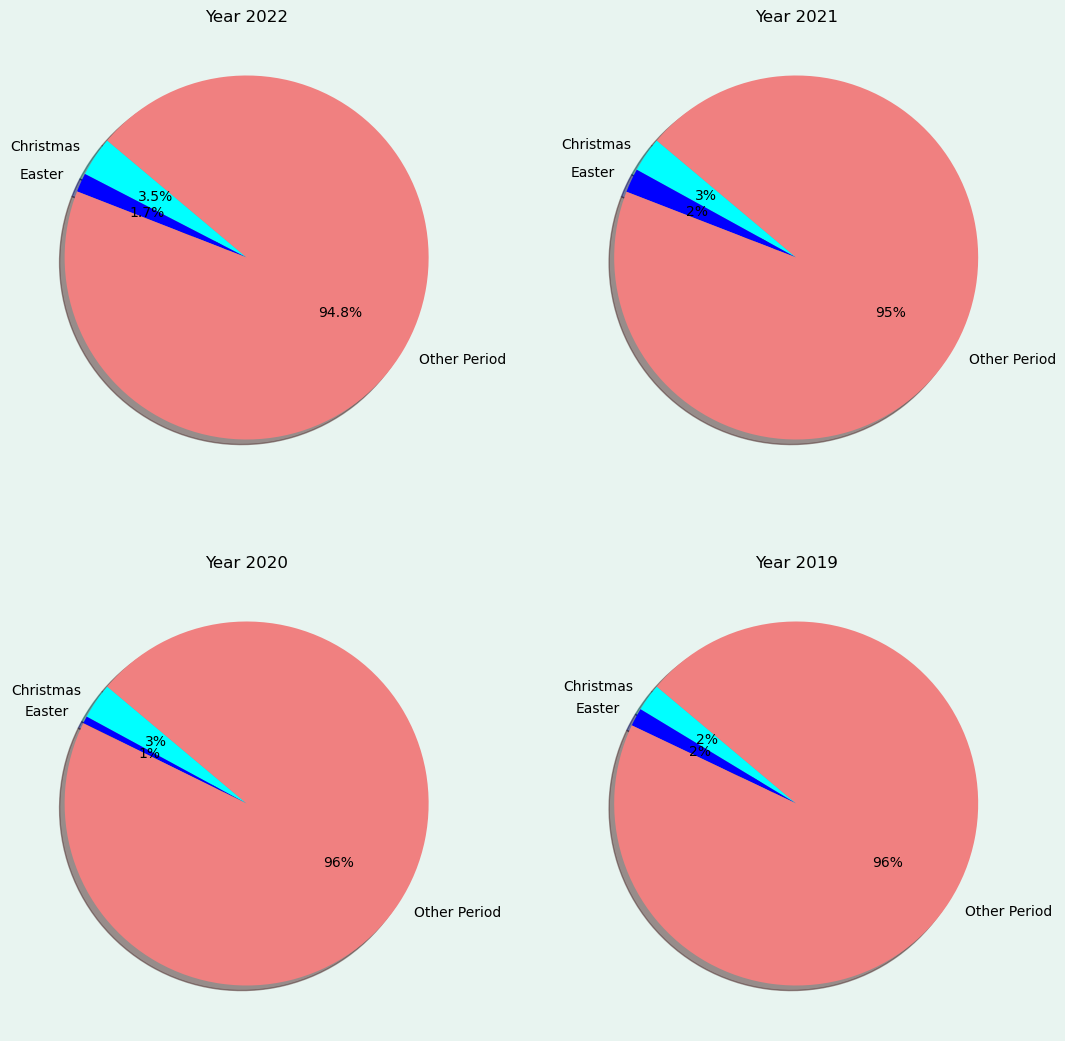

In [9]:
figure, axis = plt.subplots(2, 2,figsize=(13, 13),facecolor='#e8f4f0')
#figure.delaxes(ax= axis[2,1])
colours = ["cyan","blue","lightcoral"]
explode = (0,0,0)
pie_label = ['Christmas','Easter','Other Period'] 

# For 2022

# Clean the Data
df_2022_onChris = df_2022.loc[df_2022['Christmas Period']=='Yes']
df_2022_onEaster = df_2022.loc[df_2022['Easter Period']=='Yes']
df_2022_ordDay = df_2022.loc[(df_2022['Christmas Period']=='No') & (df_2022['Easter Period']=='No')]

# Tell matplotlib to create a pie chart based upon the above data
pie_values = [df_2022_onChris['Crash ID'].count(),df_2022_onEaster['Crash ID'].count(),df_2022_ordDay['Crash ID'].count()]
axis[0, 0].pie(pie_values, explode=explode, labels=pie_label, colors=colours,autopct="%1.1f%%", shadow=True, startangle=140)
axis[0, 0].set_title("Year 2022")


# For 2021

# Clean the Data
df_2021_onChris = df_2021.loc[df_2021['Christmas Period']=='Yes']
df_2021_onEaster = df_2021.loc[df_2021['Easter Period']=='Yes']
df_2021_ordDay = df_2021.loc[(df_2021['Christmas Period']=='No') & (df_2021['Easter Period']=='No')]

#Tell matplotlib to create a pie chart based upon the above data
pie_values = [df_2021_onChris['Crash ID'].count(),df_2021_onEaster['Crash ID'].count(),df_2021_ordDay['Crash ID'].count()]
axis[0, 1].pie(pie_values, explode=explode, labels=pie_label, colors=colours,autopct="%.0f%%", shadow=True, startangle=140)
axis[0, 1].set_title("Year 2021")


# For 2020

# Clean the Data
df_2020_onChris = df_2020.loc[df_2020['Christmas Period']=='Yes']
df_2020_onEaster = df_2020.loc[df_2020['Easter Period']=='Yes']
df_2020_ordDay = df_2020.loc[(df_2020['Christmas Period']=='No') & (df_2020['Easter Period']=='No')]

# Tell matplotlib to create a pie chart based upon the above data
pie_values = [df_2020_onChris['Crash ID'].count(),df_2020_onEaster['Crash ID'].count(),df_2020_ordDay['Crash ID'].count()]
axis[1, 0].pie(pie_values, explode=explode, labels=pie_label, colors=colours,autopct="%.0f%%", shadow=True, startangle=140)
axis[1, 0].set_title("Year 2020")


# For 2019

# Clean the Data
df_2019_onChris = df_2019.loc[df_2019['Christmas Period']=='Yes']
df_2019_onEaster = df_2019.loc[df_2019['Easter Period']=='Yes']
df_2019_ordDay = df_2019.loc[(df_2019['Christmas Period']=='No') & (df_2019['Easter Period']=='No')]

pie_values = [df_2019_onChris['Crash ID'].count(),df_2019_onEaster['Crash ID'].count(),df_2019_ordDay['Crash ID'].count()]
axis[1, 1].pie(pie_values, explode=explode, labels=pie_label, colors=colours,autopct="%.0f%%", shadow=True, startangle=140)
axis[1, 1].set_title("Year 2019")


plt.show()



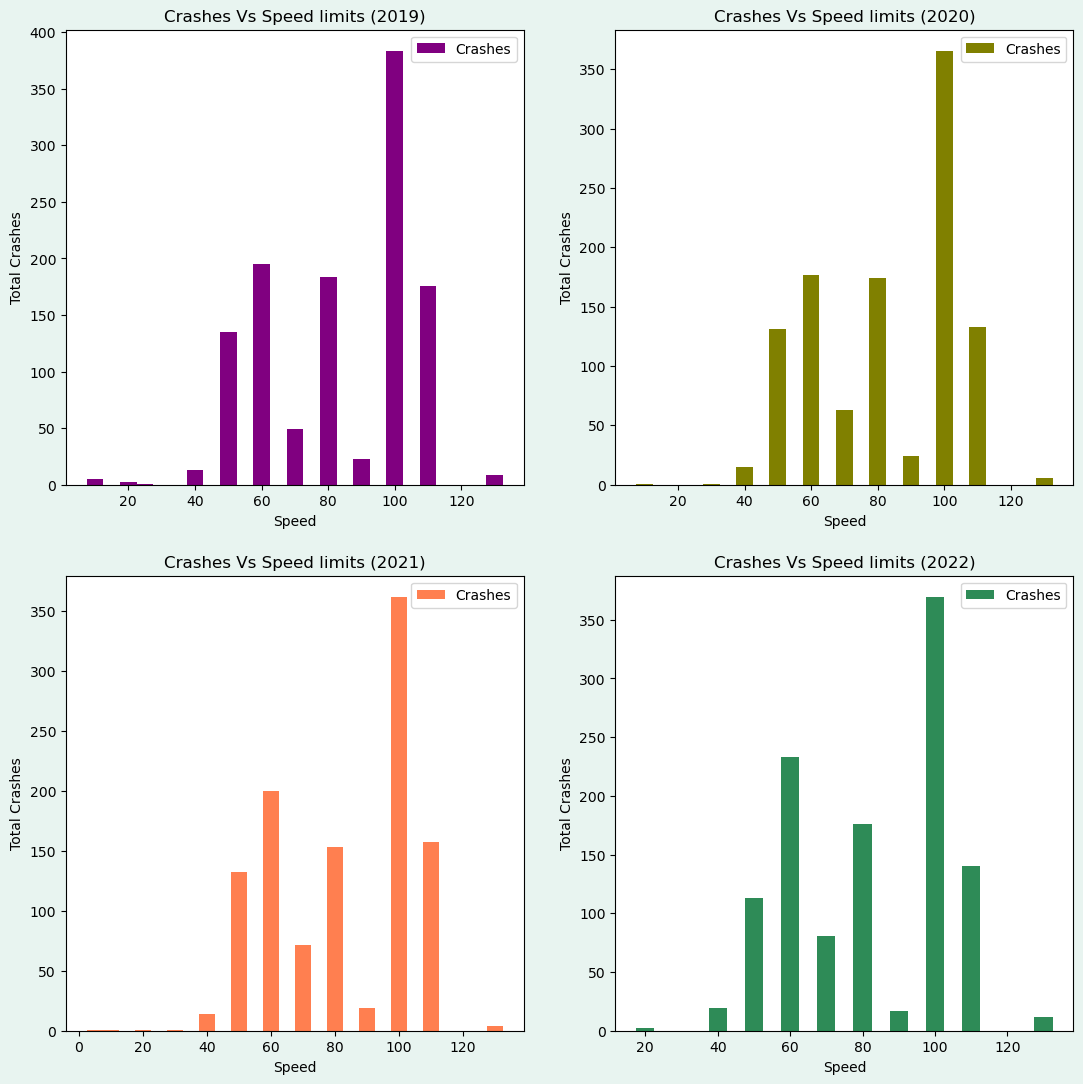

In [10]:
# Speed limits and their crash patterns in pre(2019),during(2020) & post covid(2021,2022)


# set up figure and axis to display all 4 years in same subplot
figure, axis = plt.subplots(2, 2,figsize=(13, 13),facecolor='#e8f4f0')
for ax in axis.flat:
    ax.set(xlabel='Speed', ylabel='Total Crashes')


df_2019_speed = df_2019.loc[df_2019['Speed Limit'] != '-9']
df_2019_speed = df_2019_speed.groupby('Speed Limit')[['Crash ID']].count()
df_2019_speed = df_2019_speed.reset_index()
df_2019_speed['Speed Limit'] = pd.to_numeric(df_2019_speed['Speed Limit'], errors='coerce')
df_2019_speed.sort_values(by='Speed Limit',ascending=True,inplace=True)
axis[0, 0].bar(df_2019_speed['Speed Limit'],df_2019_speed['Crash ID'],color='purple',width=5)
axis[0, 0].set_title("Crashes Vs Speed limits (2019)")
axis[0, 0].legend(['Crashes'])  

df_2020_speed = df_2020.loc[df_2020['Speed Limit'] != '-9']
df_2020_speed = df_2020_speed.groupby('Speed Limit')[['Crash ID']].count()
df_2020_speed = df_2020_speed.reset_index()
df_2020_speed['Speed Limit'] = pd.to_numeric(df_2020_speed['Speed Limit'], errors='coerce')
df_2020_speed.sort_values(by='Speed Limit',ascending=True,inplace=True)
axis[0, 1].bar(df_2020_speed['Speed Limit'],df_2020_speed['Crash ID'],color='olive',width=5)
axis[0, 1].set_title("Crashes Vs Speed limits (2020)")
axis[0, 1].legend(['Crashes'])   


df_2021_speed = df_2021.loc[df_2021['Speed Limit'] != '-9']
df_2021_speed = df_2021_speed.groupby('Speed Limit')[['Crash ID']].count()
df_2021_speed = df_2021_speed.reset_index()
df_2021_speed['Speed Limit'] = pd.to_numeric(df_2021_speed['Speed Limit'], errors='coerce')
df_2021_speed.sort_values(by='Speed Limit',ascending=True,inplace=True)
axis[1, 0].bar(df_2021_speed['Speed Limit'],df_2021_speed['Crash ID'],color='coral',width=5)
axis[1, 0].set_title("Crashes Vs Speed limits (2021)")
axis[1, 0].legend(['Crashes'])   
    

df_2022_speed = df_2022.loc[df_2022['Speed Limit'] != '-9']
df_2022_speed = df_2022_speed.groupby('Speed Limit')[['Crash ID']].count()
df_2022_speed = df_2022_speed.reset_index()
df_2022_speed['Speed Limit'] = pd.to_numeric(df_2022_speed['Speed Limit'], errors='coerce')
df_2022_speed.sort_values(by='Speed Limit',ascending=True,inplace=True)
axis[1, 1].bar(df_2022_speed['Speed Limit'],df_2022_speed['Crash ID'],color='seagreen',width=5)
axis[1, 1].set_title("Crashes Vs Speed limits (2022)")
axis[1, 1].legend(['Crashes'])   



plt.show()




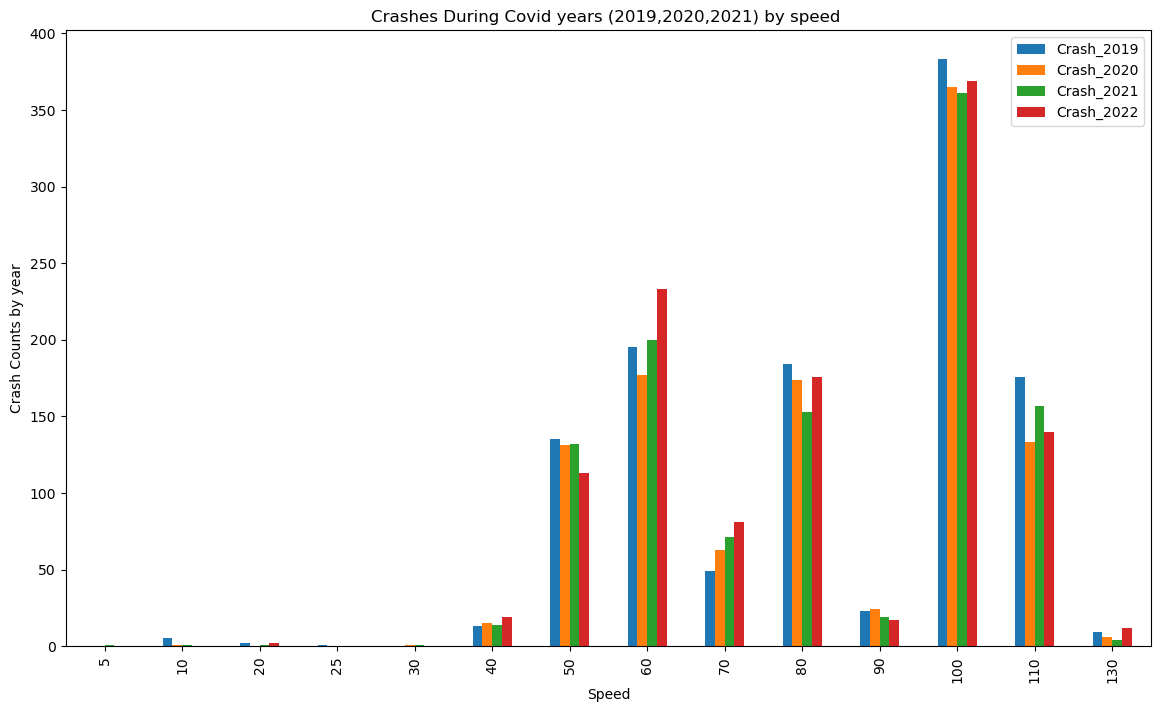

In [11]:
# Average crashes and speed patterns for last 4 years


df_speed_pattern_last4years = df_2019_speed.copy(deep=True)
df_speed_pattern_last4years = pd.merge(pd.merge(df_speed_pattern_last4years,df_2020_speed,on="Speed Limit",how="outer"),df_2021_speed,on="Speed Limit",how="outer")
df_speed_pattern_last4years.rename(columns = {'Crash ID_x':'Crash_2019'},inplace=True)
df_speed_pattern_last4years.rename(columns = {'Crash ID_y':'Crash_2020'},inplace=True)
df_speed_pattern_last4years = pd.merge(df_speed_pattern_last4years,df_2022_speed,on="Speed Limit",how="outer")
df_speed_pattern_last4years.rename(columns = {'Crash ID_x':'Crash_2021'},inplace=True)
df_speed_pattern_last4years.rename(columns = {'Crash ID_y':'Crash_2022'},inplace=True)

df_speed_pattern_last4years['Speed Limit'] = pd.to_numeric(df_speed_pattern_last4years['Speed Limit'], errors='coerce')
df_speed_pattern_last4years.sort_values(by='Speed Limit',ascending=True,inplace=True)

df_speed_pattern_last4years.plot(x="Speed Limit",y=['Crash_2019','Crash_2020','Crash_2021','Crash_2022'],kind='bar',figsize=(14,8))
plt.title("Crashes During Covid years (2019,2020,2021) by speed ")
plt.xlabel("Speed")
plt.ylabel("Crash Counts by year")
plt.legend(bbox_to_anchor=(1.0, 1.0),loc="best")
plt.show()
#df_speed_pattern_last4years


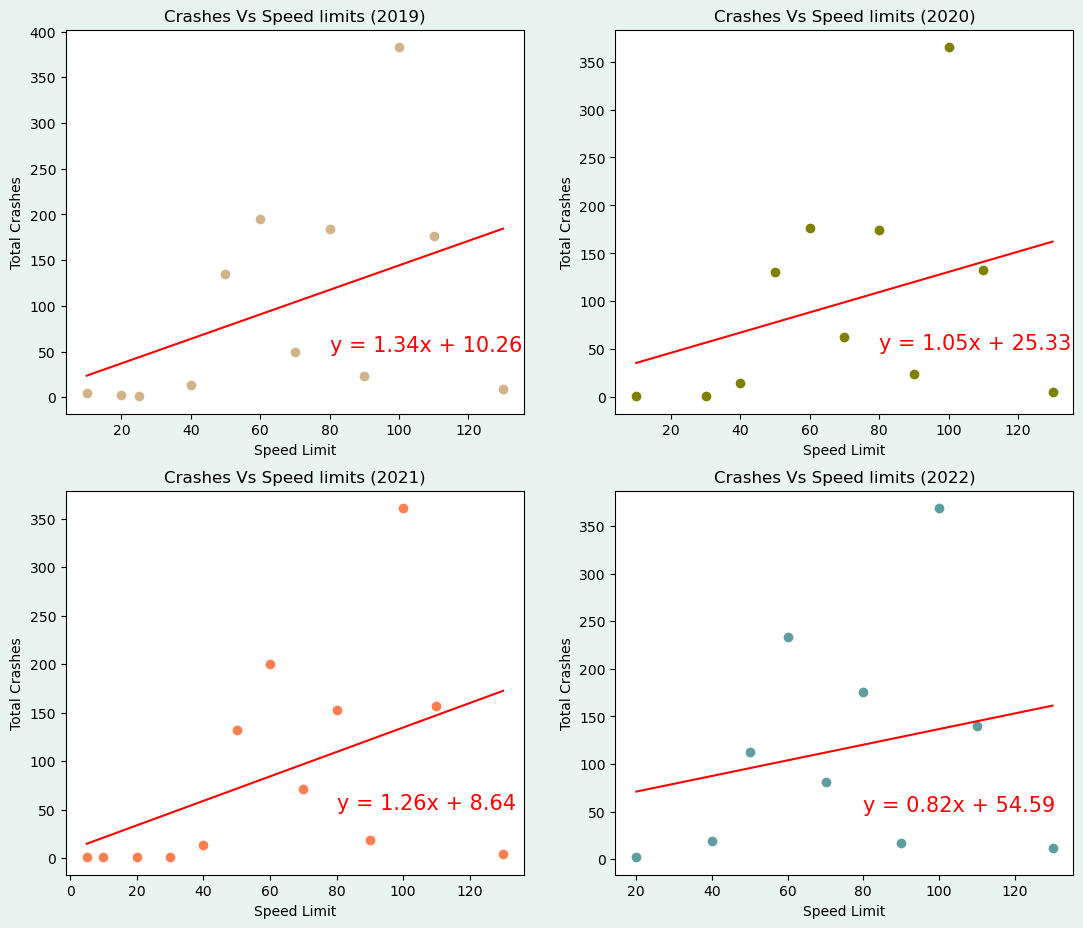

The correlation between both factors for year 2019 is 0.43
The r-squared for 2019 is : 0.18279680344693108
*********************************************
The correlation between both factors for year 2020 is 0.34
The r-squared for 2019 is : 0.11589433763540408
*********************************************
The correlation between both factors for year 2021 is 0.45
The r-squared for 2019 is : 0.20632863974668222
*********************************************
The correlation between both factors for year 2022 is 0.23
The r-squared for 2019 is : 0.054838213640727565
*********************************************


In [12]:
# Speed limits and their crash patterns relationship in pre(2019),during(2020) & post covid(2021,2022)

# set up figure and axis to display all 4 years in same subplot
figure, axis = plt.subplots(2, 2,figsize=(13, 13),facecolor='#e8f4f0')
for ax in axis.flat:
    ax.set(xlabel='Speed Limit', ylabel='Total Crashes')

# For 2019

# Set up x and y axis 
df_2019_speed = df_2019.loc[df_2019['Speed Limit'] != '-9']
df_2019_speed = df_2019_speed.groupby('Speed Limit')[['Crash ID']].count()
df_2019_speed = df_2019_speed.reset_index()
df_2019_speed['Speed Limit'] = pd.to_numeric(df_2019_speed['Speed Limit'], errors='coerce')
df_2019_speed.sort_values(by='Speed Limit',ascending=True,inplace=True)
x_values = df_2019_speed['Speed Limit']
y_values = df_2019_speed['Crash ID']

# Calculate correlation & r values
correlation_2019 = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue_2019, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept

# Set up axis to plot graphs & regressions
axis[0, 0].scatter(x_values,y_values,color='tan')
axis[0, 0].plot(x_values,regress_values,"r-")
axis[0, 0].annotate(line_eq,(80,50),fontsize=15,color="red")
axis[0, 0].set_title("Crashes Vs Speed limits (2019)")


# For 2020

# Set up x and y axis 
df_2020_speed = df_2020.loc[df_2020['Speed Limit'] != '-9']
df_2020_speed = df_2020_speed.groupby('Speed Limit')[['Crash ID']].count()
df_2020_speed = df_2020_speed.reset_index()
df_2020_speed['Speed Limit'] = pd.to_numeric(df_2020_speed['Speed Limit'], errors='coerce')
df_2020_speed.sort_values(by='Speed Limit',ascending=True,inplace=True)
x_values = df_2020_speed['Speed Limit']
y_values = df_2020_speed['Crash ID']

# Calculate correlation & r values
correlation_2020 = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue_2020, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Set up axis to plot graphs & regressions
axis[0, 1].scatter(x_values,y_values,color='olive')
axis[0, 1].plot(x_values,regress_values,"r-")
axis[0, 1].annotate(line_eq,(80,50),fontsize=15,color="red")
axis[0, 1].set_title("Crashes Vs Speed limits (2020)")

# For 2021

# Set up x and y axis 
df_2021_speed = df_2021.loc[df_2021['Speed Limit'] != '-9']
df_2021_speed = df_2021_speed.groupby('Speed Limit')[['Crash ID']].count()
df_2021_speed = df_2021_speed.reset_index()
df_2021_speed['Speed Limit'] = pd.to_numeric(df_2021_speed['Speed Limit'], errors='coerce')
df_2021_speed.sort_values(by='Speed Limit',ascending=True,inplace=True)
x_values = df_2021_speed['Speed Limit']
y_values = df_2021_speed['Crash ID']

# Calculate correlation & r values
correlation_2021 = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue_2021, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Set up axis to plot graphs & regressions
axis[1, 0].scatter(x_values,y_values,color='coral')
axis[1, 0].plot(x_values,regress_values,"r-")
axis[1, 0].annotate(line_eq,(80,50),fontsize=15,color="red")
axis[1, 0].set_title("Crashes Vs Speed limits (2021)")


# For 2022

# Set up x and y axis 
df_2022_speed = df_2022.loc[df_2022['Speed Limit'] != '-9']
df_2022_speed = df_2022_speed.groupby('Speed Limit')[['Crash ID']].count()
df_2022_speed = df_2022_speed.reset_index()
df_2022_speed['Speed Limit'] = pd.to_numeric(df_2022_speed['Speed Limit'], errors='coerce')
df_2022_speed.sort_values(by='Speed Limit',ascending=True,inplace=True)
x_values = df_2022_speed['Speed Limit']
y_values = df_2022_speed['Crash ID']

# Calculate correlation & r values
correlation_2022 = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue_2022, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Set up axis to plot graphs & regressions
axis[1, 1].scatter(x_values,y_values,color='cadetblue')
axis[1, 1].plot(x_values,regress_values,"r-")
axis[1, 1].annotate(line_eq,(80,50),fontsize=15,color="red")
axis[1, 1].set_title("Crashes Vs Speed limits (2022)")

plt.subplots_adjust(top=0.75, bottom=0.10)
plt.show()
print(f"The correlation between both factors for year 2019 is {round(correlation_2019[0],2)}")
print(f"The r-squared for 2019 is : {rvalue_2019**2}")
print("*********************************************")
print(f"The correlation between both factors for year 2020 is {round(correlation_2020[0],2)}")
print(f"The r-squared for 2019 is : {rvalue_2020**2}")
print("*********************************************")
print(f"The correlation between both factors for year 2021 is {round(correlation_2021[0],2)}")
print(f"The r-squared for 2019 is : {rvalue_2021**2}")
print("*********************************************")
print(f"The correlation between both factors for year 2022 is {round(correlation_2022[0],2)}")
print(f"The r-squared for 2019 is : {rvalue_2022**2}")
print("*********************************************")



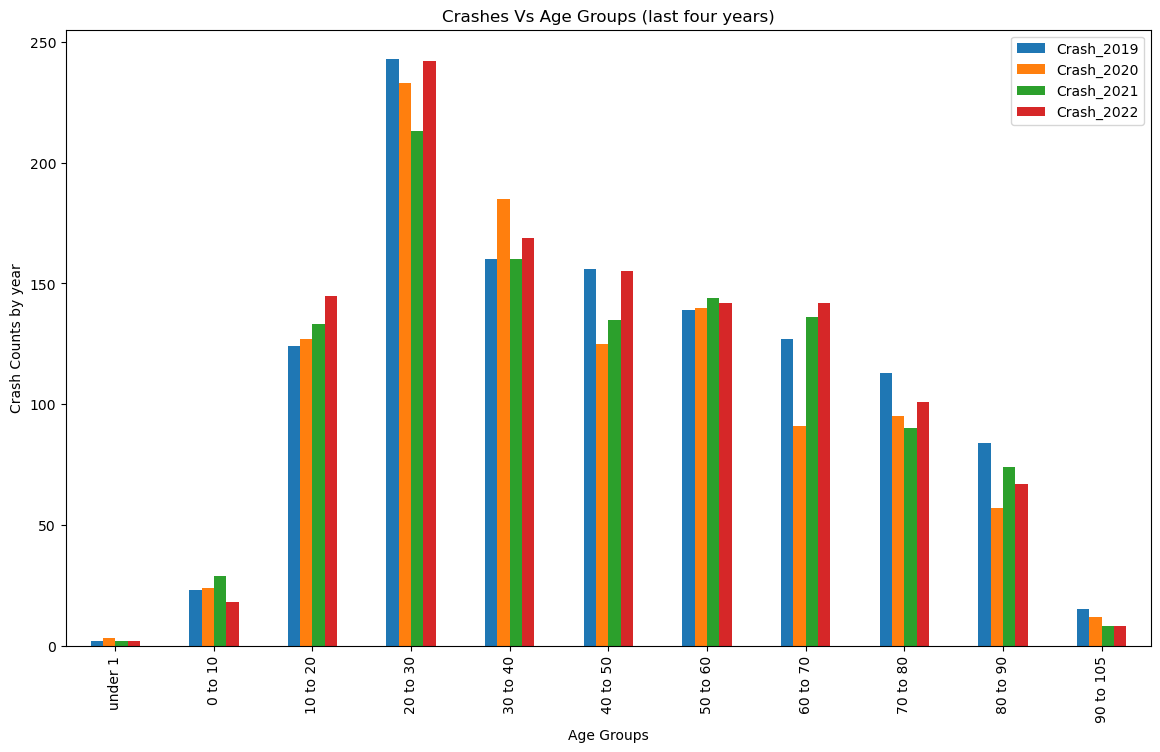

In [13]:
# Age Groups and their crash patterns relationship in pre(2019),during(2020) & post covid(2021,2022)


# Create bins in which to place values based upon school size
bins = [-1,0,10,20,30,40,50,60,70,80,90,105]

# Create labels for these bins

group_labels = ["under 1","0 to 10","10 to 20", "20 to 30", "30 to 40","40 to 50","50 to 60","60 to 70","70 to 80",
                "80 to 90","90 to 105"]

# For 2019
df_2019_age = df_2019.loc[df_2019['Age'] != '-9']
df_2019_age = df_2019_age.groupby('Age')['Crash ID'].count()
df_2019_age = df_2019_age.reset_index()

df_2019_age['Age Group'] = pd.cut(df_2019_age['Age'],bins,labels=group_labels)
df_2019_age_group = pd.DataFrame(df_2019_age.groupby('Age Group')['Crash ID'].sum())
df_2019_age_group = df_2019_age_group.reset_index()
df_2019_age_group

# For 2020
df_2020_age = df_2020.loc[df_2020['Age'] != '-9']
df_2020_age = df_2020_age.groupby('Age')['Crash ID'].count()
df_2020_age = df_2020_age.reset_index()

df_2020_age['Age Group'] = pd.cut(df_2020_age['Age'],bins,labels=group_labels)
df_2020_age_group = pd.DataFrame(df_2020_age.groupby('Age Group')['Crash ID'].sum())
df_2020_age_group = df_2020_age_group.reset_index()
df_2020_age_group

# For 2021
df_2021_age = df_2021.loc[df_2021['Age'] != '-9']
df_2021_age = df_2021_age.groupby('Age')['Crash ID'].count()
df_2021_age = df_2021_age.reset_index()

df_2021_age['Age Group'] = pd.cut(df_2021_age['Age'],bins,labels=group_labels)
df_2021_age_group = pd.DataFrame(df_2021_age.groupby('Age Group')['Crash ID'].sum())
df_2021_age_group = df_2021_age_group.reset_index()
df_2021_age_group

# For 2022
df_2022_age = df_2022.loc[df_2022['Age'] != '-9']
df_2022_age = df_2022_age.groupby('Age')['Crash ID'].count()
df_2022_age = df_2022_age.reset_index()

df_2022_age['Age Group'] = pd.cut(df_2022_age['Age'],bins,labels=group_labels)
df_2022_age_group = pd.DataFrame(df_2022_age.groupby('Age Group')['Crash ID'].sum())
df_2022_age_group = df_2022_age_group.reset_index()
df_2022_age_group

df_age_group_last4years = df_2019_age_group.copy(deep=True)
df_age_group_last4years = pd.merge(pd.merge(df_age_group_last4years,df_2020_age_group,on="Age Group",how="outer"),df_2021_age_group,on="Age Group",how="outer")
df_age_group_last4years.rename(columns = {'Crash ID_x':'Crash_2019'},inplace=True)
df_age_group_last4years.rename(columns = {'Crash ID_y':'Crash_2020'},inplace=True)           
df_age_group_last4years = pd.merge(df_age_group_last4years,df_2022_age_group,on="Age Group",how="outer")
df_age_group_last4years.rename(columns = {'Crash ID_x':'Crash_2021'},inplace=True)
df_age_group_last4years.rename(columns = {'Crash ID_y':'Crash_2022'},inplace=True)

df_age_group_last4years

#df_speed_pattern_last4years['Speed Limit'] = pd.to_numeric(df_speed_pattern_last4years['Speed Limit'], errors='coerce')
#df_speed_pattern_last4years.sort_values(by='Speed Limit',ascending=True,inplace=True)

df_age_group_last4years.plot(x="Age Group",y=['Crash_2019','Crash_2020','Crash_2021','Crash_2022'],kind='bar',figsize=(14,8))
plt.title("Crashes Vs Age Groups (last four years)")
plt.xlabel("Age Groups")
plt.ylabel("Crash Counts by year")
plt.legend(bbox_to_anchor=(1.0, 1.0),loc="best")
plt.show()



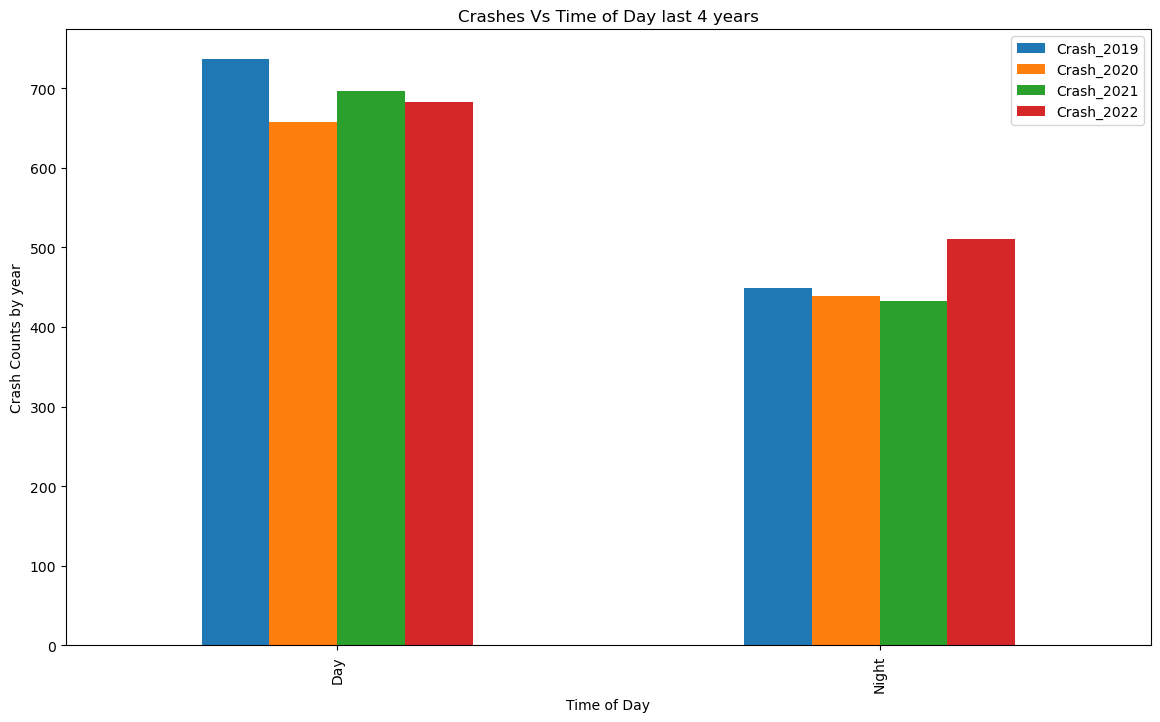

In [14]:
# Crashes Day vs Night
# 2018
df_2018_dn = pd.DataFrame(df_2018.groupby('Time of day')['Crash ID'].count())
df_2018_dn = df_2018_dn.reset_index()

# 2019
df_2019_dn = pd.DataFrame(df_2019.groupby('Time of day')['Crash ID'].count())
df_2019_dn = df_2019_dn.reset_index()

# 2020
df_2020_dn = pd.DataFrame(df_2020.groupby('Time of day')['Crash ID'].count())
df_2020_dn = df_2020_dn.reset_index()
df_2020_dn

#2021
df_2021_dn = pd.DataFrame(df_2021.groupby('Time of day')['Crash ID'].count())
df_2021_dn = df_2021_dn.reset_index()

#2022
df_2022_dn = pd.DataFrame(df_2022.groupby('Time of day')['Crash ID'].count())
df_2022_dn = df_2022_dn.reset_index()

df_day_night_last4years = df_2019_dn.copy(deep=True)
df_day_night_last4years = pd.merge(pd.merge(df_day_night_last4years,df_2020_dn,on="Time of day",how="outer"),df_2021_dn,on="Time of day",how="outer")
df_day_night_last4years.rename(columns = {'Crash ID_x':'Crash_2019'},inplace=True)
df_day_night_last4years.rename(columns = {'Crash ID_y':'Crash_2020'},inplace=True)          
df_day_night_last4years = pd.merge(df_day_night_last4years,df_2022_dn,on="Time of day",how="outer")
df_day_night_last4years.rename(columns = {'Crash ID_x':'Crash_2021'},inplace=True)
df_day_night_last4years.rename(columns = {'Crash ID_y':'Crash_2022'},inplace=True)


df_day_night_last4years.plot(x="Time of day",y=['Crash_2019','Crash_2020','Crash_2021','Crash_2022'],kind='bar',figsize=(14,8))
plt.title("Crashes Vs Time of Day last 4 years")
plt.xlabel("Time of Day")
plt.ylabel("Crash Counts by year")
plt.legend(bbox_to_anchor=(1.0, 1.0),loc="best")
plt.show()


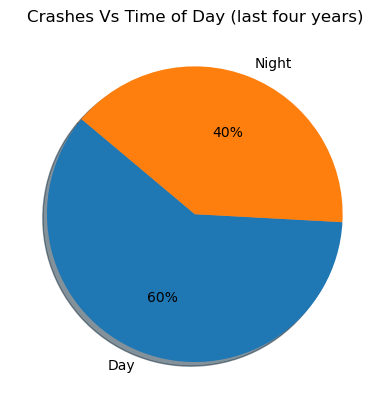

In [15]:
# crashes vs time of the dayt it happend over last 4 years 

df_day_night_last4years['Avg'] = (df_day_night_last4years['Crash_2019'] + df_day_night_last4years["Crash_2020"] + df_day_night_last4years["Crash_2021"]+df_day_night_last4years["Crash_2022"])/4
pie_values = [df_day_night_last4years.at[0,'Avg'],df_day_night_last4years.at[1,'Avg']]
plt.pie(pie_values, labels=['Day',"Night"],autopct="%.0f%%", shadow=True, startangle=140)
plt.title("Crashes Vs Time of Day (last four years)")
plt.show()



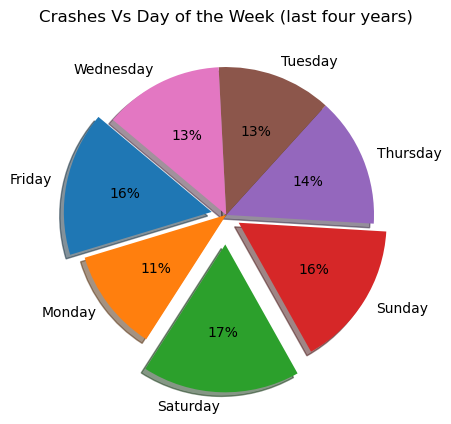

In [16]:
# Crashes vs day of the week over last 4 years

# 2019
df_2019_day = pd.DataFrame(df_2019.groupby('Dayweek')['Crash ID'].count())
df_2019_day = df_2019_day.reset_index()

# 2020
df_2020_day = pd.DataFrame(df_2020.groupby('Dayweek')['Crash ID'].count())
df_2020_day = df_2020_day.reset_index()
df_2020_day

#2021
df_2021_day = pd.DataFrame(df_2021.groupby('Dayweek')['Crash ID'].count())
df_2021_day = df_2021_day.reset_index()

#2022
df_2022_day = pd.DataFrame(df_2022.groupby('Dayweek')['Crash ID'].count())
df_2022_day = df_2022_day.reset_index()

df_day_last4years = df_2019_day.copy(deep=True)
df_day_last4years = pd.merge(pd.merge(df_day_last4years,df_2020_day,on="Dayweek",how="outer"),df_2021_day,on="Dayweek",how="outer")
df_day_last4years.rename(columns = {'Crash ID_x':'Crash_2019'},inplace=True)
df_day_last4years.rename(columns = {'Crash ID_y':'Crash_2020'},inplace=True)          
df_day_last4years = pd.merge(df_day_last4years,df_2022_day,on="Dayweek",how="outer")
df_day_last4years.rename(columns = {'Crash ID_x':'Crash_2021'},inplace=True)
df_day_last4years.rename(columns = {'Crash ID_y':'Crash_2022'},inplace=True)


explode = (0.1,0,0.2,0.1,0,0,0)
df_day_last4years['Avg'] = (df_day_last4years['Crash_2019'] + df_day_last4years["Crash_2020"] + df_day_last4years["Crash_2021"]+df_day_last4years["Crash_2022"])/4
pie_values = [df_day_last4years.at[0,'Avg'],df_day_last4years.at[1,'Avg'],df_day_last4years.at[2,'Avg'],df_day_last4years.at[3,'Avg'],df_day_last4years.at[4,'Avg'],df_day_last4years.at[5,'Avg'],df_day_last4years.at[6,'Avg']]
plt.pie(pie_values,explode=explode,labels=['Friday',"Monday",'Saturday','Sunday','Thursday','Tuesday','Wednesday'],autopct="%.0f%%", shadow=True, startangle=140)
plt.title("Crashes Vs Day of the Week (last four years)")
plt.show()
#df_day_last4years


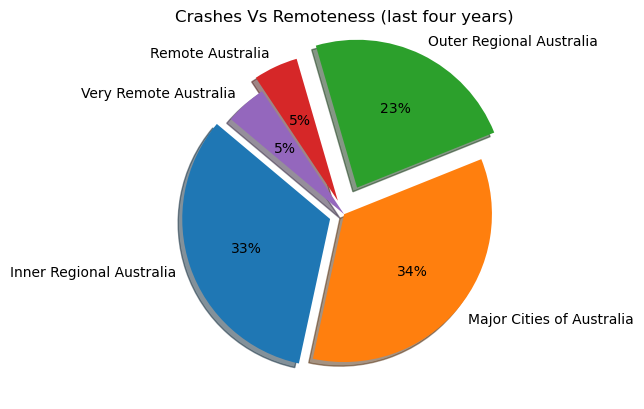

In [17]:
# carshes vs road type(Access Road, )

# 2019
df_2019_remoteness = df_2019.loc[df_2019['National Remoteness Areas'] != '-9']
df_2019_remoteness = df_2019_remoteness.groupby('National Remoteness Areas')['Crash ID'].count()
df_2019_remoteness = df_2019_remoteness.reset_index()

# 2020
df_2020_remoteness = df_2020.loc[df_2020['National Remoteness Areas'] != '-9']
df_2020_remoteness = df_2020_remoteness.groupby('National Remoteness Areas')['Crash ID'].count()
df_2020_remoteness = df_2020_remoteness.reset_index()

#2021
df_2021_remoteness = df_2021.loc[df_2021['National Remoteness Areas'] != '-9']
df_2021_remoteness = df_2021_remoteness.groupby('National Remoteness Areas')['Crash ID'].count()
df_2021_remoteness = df_2021_remoteness.reset_index()

#2022
df_2022_remoteness = df_2022.loc[df_2022['National Remoteness Areas'] != '-9']
df_2022_remoteness = df_2022_remoteness.groupby('National Remoteness Areas')['Crash ID'].count()
df_2022_remoteness = df_2022_remoteness.reset_index()

df_remoteness_last4years = df_2019_remoteness.copy(deep=True)
df_remoteness_last4years = pd.merge(pd.merge(df_remoteness_last4years,df_2020_remoteness,on="National Remoteness Areas",how="outer"),df_2021_remoteness,on="National Remoteness Areas",how="outer")
df_remoteness_last4years.rename(columns = {'Crash ID_x':'Crash_2019'},inplace=True)
df_remoteness_last4years.rename(columns = {'Crash ID_y':'Crash_2020'},inplace=True)          
df_remoteness_last4years = pd.merge(df_remoteness_last4years,df_2022_remoteness,on="National Remoteness Areas",how="outer")
df_remoteness_last4years.rename(columns = {'Crash ID_x':'Crash_2021'},inplace=True)
df_remoteness_last4years.rename(columns = {'Crash ID_y':'Crash_2022'},inplace=True)

explode = (0.1,0,0.2,0.1,0)
df_remoteness_last4years['Avg'] = (df_remoteness_last4years['Crash_2019'] + df_remoteness_last4years["Crash_2020"] + df_remoteness_last4years["Crash_2021"]+df_remoteness_last4years["Crash_2022"])/4
pie_values = [df_remoteness_last4years.at[0,'Avg'],df_remoteness_last4years.at[1,'Avg'],df_remoteness_last4years.at[2,'Avg'],df_remoteness_last4years.at[3,'Avg'],df_remoteness_last4years.at[4,'Avg']]
plt.pie(pie_values,explode=explode,labels=['Inner Regional Australia',"Major Cities of Australia",'Outer Regional Australia','Remote Australia','Very Remote Australia'],autopct="%.0f%%", shadow=True, startangle=140)
plt.title("Crashes Vs Remoteness (last four years)")
plt.show()

#df_remoteness_last4years


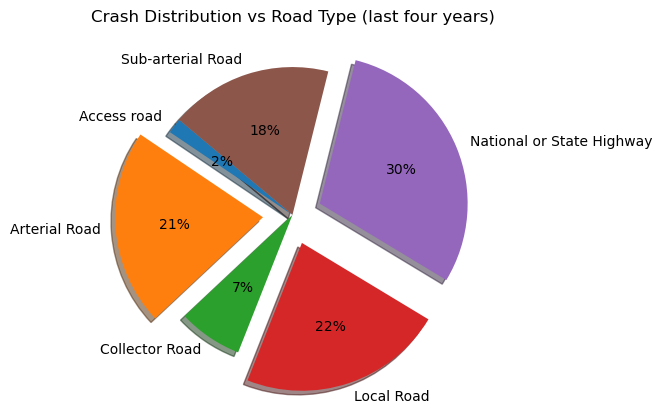

,National Road Type,Crash_2019,Crash_2020,Crash_2021,Crash_2022,Avg
0,Access road,18.0,21.0,13,20,18.00
1,Arterial Road,285.0,229.0,238,180,233.00
2,Collector Road,66.0,83.0,73,83,76.25
3,Local Road,275.0,237.0,264,195,242.75
4,National or State Highway,360.0,319.0,313,301,323.25
5,Pedestrian Thoroughfare,1.0,1.0,1,1,1.00
6,Sub-arterial Road,169.0,190.0,199,215,193.25
7,Undetermined,NaN,5.0,5,2,NaN
8,Busway,NaN,NaN,2,1,NaN


In [18]:
# carshes vs National road type

# 2019
df_2019_roadtype = df_2019.loc[df_2019['National Road Type'] != '-9']
df_2019_roadtype = df_2019_roadtype.groupby('National Road Type')['Crash ID'].count()
df_2019_roadtype = df_2019_roadtype.reset_index()

# 2020
df_2020_roadtype = df_2020.loc[df_2020['National Road Type'] != '-9']
df_2020_roadtype = df_2020_roadtype.groupby('National Road Type')['Crash ID'].count()
df_2020_roadtype = df_2020_roadtype.reset_index()

#2021
df_2021_roadtype = df_2021.loc[df_2021['National Road Type'] != '-9']
df_2021_roadtype = df_2021_roadtype.groupby('National Road Type')['Crash ID'].count()
df_2021_roadtype = df_2021_roadtype.reset_index()

#2022
df_2022_roadtype = df_2022.loc[df_2022['National Road Type'] != '-9']
df_2022_roadtype = df_2022_roadtype.groupby('National Road Type')['Crash ID'].count()
df_2022_roadtype = df_2022_roadtype.reset_index()

df_roadtype_last4years = df_2019_roadtype.copy(deep=True)
df_roadtype_last4years = pd.merge(pd.merge(df_roadtype_last4years,df_2020_roadtype,on="National Road Type",how="outer"),df_2021_roadtype,on="National Road Type",how="outer")
df_roadtype_last4years.rename(columns = {'Crash ID_x':'Crash_2019'},inplace=True)
df_roadtype_last4years.rename(columns = {'Crash ID_y':'Crash_2020'},inplace=True)          
df_roadtype_last4years = pd.merge(df_roadtype_last4years,df_2022_roadtype,on="National Road Type",how="outer")
df_roadtype_last4years.rename(columns = {'Crash ID_x':'Crash_2021'},inplace=True)
df_roadtype_last4years.rename(columns = {'Crash ID_y':'Crash_2022'},inplace=True)

df_roadtype_last4years['Avg'] = (df_roadtype_last4years['Crash_2019'] + df_roadtype_last4years["Crash_2020"] + df_roadtype_last4years["Crash_2021"]+df_roadtype_last4years["Crash_2022"])/4

explode = (0,0.2,0,0.2,0.2,0)
label = ['Access road','Arterial Road','Collector Road','Local Road','National or State Highway','Sub-arterial Road']
pie_values = [df_roadtype_last4years.at[0,'Avg'],df_roadtype_last4years.at[1,'Avg'],df_roadtype_last4years.at[2,'Avg'],df_roadtype_last4years.at[3,'Avg'],df_roadtype_last4years.at[4,'Avg'],df_roadtype_last4years.at[6,'Avg']]
plt.pie(pie_values,explode=explode,labels=label,autopct="%.0f%%", shadow=True, startangle=140)
plt.title("Crash Distribution vs Road Type (last four years)")
plt.show()
df_roadtype_last4years


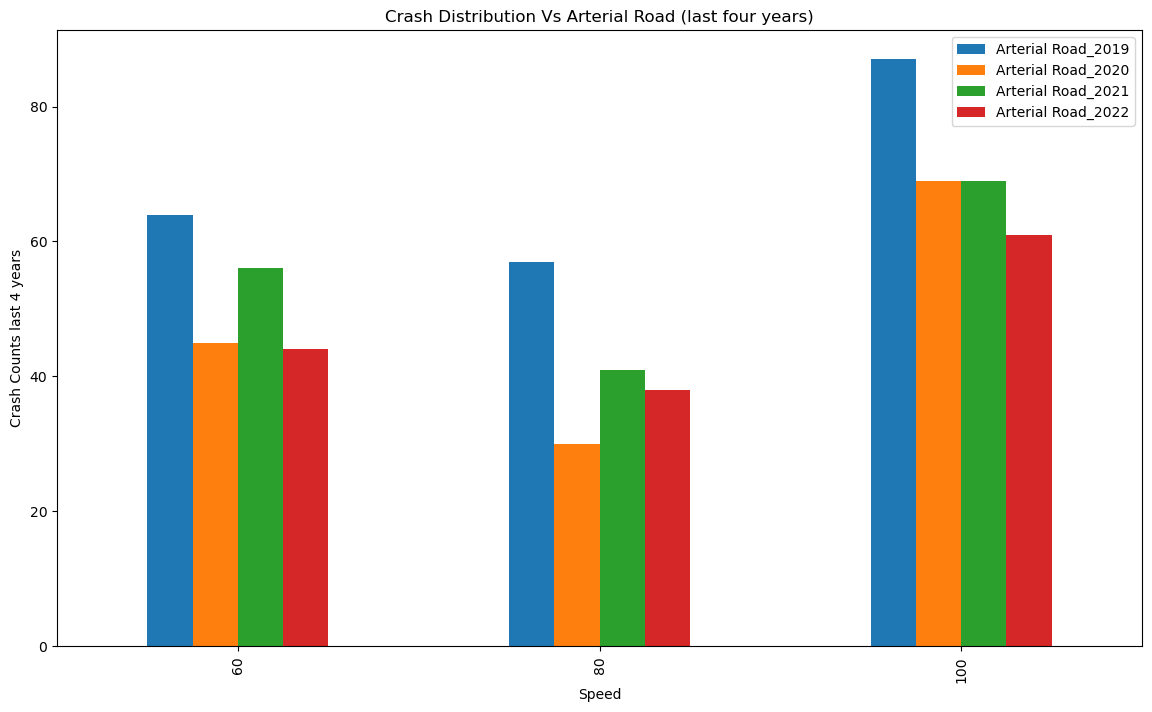

In [19]:
# How speed 60,80 & 100 impact on highways,arterial and local road

# For 2019

df_2019_speed_roadtype = df_2019.loc[df_2019['Speed Limit'] != '-9']
df_2019_speed_roadtype_arterial = df_2019_speed_roadtype.loc[df_2019_speed_roadtype['National Road Type'] == 'Arterial Road']
filt = (df_2019_speed_roadtype_arterial['Speed Limit'] == '100') | (df_2019_speed_roadtype_arterial ['Speed Limit'] == '60') | (df_2019_speed_roadtype_arterial['Speed Limit'] == '80')
df_2019_speed_roadtype_arterial = df_2019_speed_roadtype_arterial.loc[filt]
df_2019_speed_roadtype_arterial = pd.DataFrame(df_2019_speed_roadtype_arterial.groupby('Speed Limit')[['National Road Type']].count())
df_2019_speed_roadtype_arterial = df_2019_speed_roadtype_arterial.reset_index()
df_2019_speed_roadtype_arterial.rename(columns={'National Road Type':'Arterial Road_2019'},inplace=True)
df_2019_speed_roadtype_arterial

df_2019_speed_roadtype_hw = df_2019_speed_roadtype.loc[df_2019_speed_roadtype['National Road Type'] == 'National or State Highway']
filt = (df_2019_speed_roadtype_hw['Speed Limit'] == '100') | (df_2019_speed_roadtype_hw ['Speed Limit'] == '60') | (df_2019_speed_roadtype_hw['Speed Limit'] == '80')
df_2019_speed_roadtype_hw = df_2019_speed_roadtype_hw.loc[filt]
df_2019_speed_roadtype_hw = pd.DataFrame(df_2019_speed_roadtype_hw.groupby('Speed Limit')[['National Road Type']].count())
df_2019_speed_roadtype_hw = df_2019_speed_roadtype_hw.reset_index()
df_2019_speed_roadtype_hw.rename(columns={'National Road Type':'Highway_2019'},inplace=True)
df_2019_speed_roadtype_hw

df_2019_speed_roadtype_local = df_2019_speed_roadtype.loc[df_2019_speed_roadtype['National Road Type'] == 'Local Road']
filt = (df_2019_speed_roadtype_local['Speed Limit'] == '100') | (df_2019_speed_roadtype_local ['Speed Limit'] == '60') | (df_2019_speed_roadtype_local['Speed Limit'] == '80')
df_2019_speed_roadtype_local = df_2019_speed_roadtype_local.loc[filt]
df_2019_speed_roadtype_local = pd.DataFrame(df_2019_speed_roadtype_local.groupby('Speed Limit')[['National Road Type']].count())
df_2019_speed_roadtype_local = df_2019_speed_roadtype_local.reset_index()
df_2019_speed_roadtype_local.rename(columns={'National Road Type':'Local Road_2019'},inplace=True)
df_2019_speed_roadtype_local



# For 2020

df_2020_speed_roadtype = df_2020.loc[df_2020['Speed Limit'] != '-9']
df_2020_speed_roadtype_arterial = df_2020_speed_roadtype.loc[df_2020_speed_roadtype['National Road Type'] == 'Arterial Road']
filt = (df_2020_speed_roadtype_arterial['Speed Limit'] == '100') | (df_2020_speed_roadtype_arterial ['Speed Limit'] == '60') | (df_2020_speed_roadtype_arterial['Speed Limit'] == '80')
df_2020_speed_roadtype_arterial = df_2020_speed_roadtype_arterial.loc[filt]
df_2020_speed_roadtype_arterial = pd.DataFrame(df_2020_speed_roadtype_arterial.groupby('Speed Limit')[['National Road Type']].count())
df_2020_speed_roadtype_arterial = df_2020_speed_roadtype_arterial.reset_index()
df_2020_speed_roadtype_arterial.rename(columns={'National Road Type':'Arterial Road_2020'},inplace=True)
df_2020_speed_roadtype_arterial

df_2020_speed_roadtype_hw = df_2020_speed_roadtype.loc[df_2020_speed_roadtype['National Road Type'] == 'National or State Highway']
filt = (df_2020_speed_roadtype_hw['Speed Limit'] == '100') | (df_2020_speed_roadtype_hw ['Speed Limit'] == '60') | (df_2020_speed_roadtype_hw['Speed Limit'] == '80')
df_2020_speed_roadtype_hw = df_2020_speed_roadtype_hw.loc[filt]
df_2020_speed_roadtype_hw = pd.DataFrame(df_2020_speed_roadtype_hw.groupby('Speed Limit')[['National Road Type']].count())
df_2020_speed_roadtype_hw = df_2020_speed_roadtype_hw.reset_index()
df_2020_speed_roadtype_hw.rename(columns={'National Road Type':'Highway_2020'},inplace=True)
df_2020_speed_roadtype_hw

df_2020_speed_roadtype_local = df_2020_speed_roadtype.loc[df_2020_speed_roadtype['National Road Type'] == 'Local Road']
filt = (df_2020_speed_roadtype_local['Speed Limit'] == '100') | (df_2020_speed_roadtype_local ['Speed Limit'] == '60') | (df_2020_speed_roadtype_local['Speed Limit'] == '80')
df_2020_speed_roadtype_local = df_2020_speed_roadtype_local.loc[filt]
df_2020_speed_roadtype_local = pd.DataFrame(df_2020_speed_roadtype_local.groupby('Speed Limit')[['National Road Type']].count())
df_2020_speed_roadtype_local = df_2020_speed_roadtype_local.reset_index()
df_2020_speed_roadtype_local.rename(columns={'National Road Type':'Local Road_2020'},inplace=True)
df_2020_speed_roadtype_local

# For 2021

df_2021_speed_roadtype = df_2021.loc[df_2021['Speed Limit'] != '-9']
df_2021_speed_roadtype_arterial = df_2021_speed_roadtype.loc[df_2021_speed_roadtype['National Road Type'] == 'Arterial Road']
filt = (df_2021_speed_roadtype_arterial['Speed Limit'] == '100') | (df_2021_speed_roadtype_arterial ['Speed Limit'] == '60') | (df_2021_speed_roadtype_arterial['Speed Limit'] == '80')
df_2021_speed_roadtype_arterial = df_2021_speed_roadtype_arterial.loc[filt]
df_2021_speed_roadtype_arterial = pd.DataFrame(df_2021_speed_roadtype_arterial.groupby('Speed Limit')[['National Road Type']].count())
df_2021_speed_roadtype_arterial = df_2021_speed_roadtype_arterial.reset_index()
df_2021_speed_roadtype_arterial.rename(columns={'National Road Type':'Arterial Road_2021'},inplace=True)
df_2021_speed_roadtype_arterial

df_2021_speed_roadtype_hw = df_2021_speed_roadtype.loc[df_2021_speed_roadtype['National Road Type'] == 'National or State Highway']
filt = (df_2021_speed_roadtype_hw['Speed Limit'] == '100') | (df_2021_speed_roadtype_hw ['Speed Limit'] == '60') | (df_2021_speed_roadtype_hw['Speed Limit'] == '80')
df_2021_speed_roadtype_hw = df_2021_speed_roadtype_hw.loc[filt]
df_2021_speed_roadtype_hw = pd.DataFrame(df_2021_speed_roadtype_hw.groupby('Speed Limit')[['National Road Type']].count())
df_2021_speed_roadtype_hw = df_2021_speed_roadtype_hw.reset_index()
df_2021_speed_roadtype_hw.rename(columns={'National Road Type':'Highway_2021'},inplace=True)
df_2021_speed_roadtype_hw

df_2021_speed_roadtype_local = df_2021_speed_roadtype.loc[df_2021_speed_roadtype['National Road Type'] == 'Local Road']
filt = (df_2021_speed_roadtype_local['Speed Limit'] == '100') | (df_2021_speed_roadtype_local ['Speed Limit'] == '60') | (df_2021_speed_roadtype_local['Speed Limit'] == '80')
df_2021_speed_roadtype_local = df_2021_speed_roadtype_local.loc[filt]
df_2021_speed_roadtype_local = pd.DataFrame(df_2021_speed_roadtype_local.groupby('Speed Limit')[['National Road Type']].count())
df_2021_speed_roadtype_local = df_2021_speed_roadtype_local.reset_index()
df_2021_speed_roadtype_local.rename(columns={'National Road Type':'Local Road_2021'},inplace=True)
df_2021_speed_roadtype_local

# for 2022

df_2022_speed_roadtype = df_2022.loc[df_2022['Speed Limit'] != '-9']
df_2022_speed_roadtype_arterial = df_2022_speed_roadtype.loc[df_2022_speed_roadtype['National Road Type'] == 'Arterial Road']
filt = (df_2022_speed_roadtype_arterial['Speed Limit'] == '100') | (df_2022_speed_roadtype_arterial ['Speed Limit'] == '60') | (df_2022_speed_roadtype_arterial['Speed Limit'] == '80')
df_2022_speed_roadtype_arterial = df_2022_speed_roadtype_arterial.loc[filt]
df_2022_speed_roadtype_arterial = pd.DataFrame(df_2022_speed_roadtype_arterial.groupby('Speed Limit')[['National Road Type']].count())
df_2022_speed_roadtype_arterial = df_2022_speed_roadtype_arterial.reset_index()
df_2022_speed_roadtype_arterial.rename(columns={'National Road Type':'Arterial Road_2022'},inplace=True)
df_2022_speed_roadtype_arterial

df_2022_speed_roadtype_hw = df_2022_speed_roadtype.loc[df_2022_speed_roadtype['National Road Type'] == 'National or State Highway']
filt = (df_2022_speed_roadtype_hw['Speed Limit'] == '100') | (df_2022_speed_roadtype_hw ['Speed Limit'] == '60') | (df_2022_speed_roadtype_hw['Speed Limit'] == '80')
df_2022_speed_roadtype_hw = df_2022_speed_roadtype_hw.loc[filt]
df_2022_speed_roadtype_hw = pd.DataFrame(df_2022_speed_roadtype_hw.groupby('Speed Limit')[['National Road Type']].count())
df_2022_speed_roadtype_hw = df_2022_speed_roadtype_hw.reset_index()
df_2022_speed_roadtype_hw.rename(columns={'National Road Type':'Highway_2022'},inplace=True)
df_2022_speed_roadtype_hw

df_2022_speed_roadtype_local = df_2022_speed_roadtype.loc[df_2022_speed_roadtype['National Road Type'] == 'Local Road']
filt = (df_2022_speed_roadtype_local['Speed Limit'] == '100') | (df_2022_speed_roadtype_local ['Speed Limit'] == '60') | (df_2022_speed_roadtype_local['Speed Limit'] == '80')
df_2022_speed_roadtype_local = df_2022_speed_roadtype_local.loc[filt]
df_2022_speed_roadtype_local = pd.DataFrame(df_2022_speed_roadtype_local.groupby('Speed Limit')[['National Road Type']].count())
df_2022_speed_roadtype_local = df_2022_speed_roadtype_local.reset_index()
df_2022_speed_roadtype_local.rename(columns={'National Road Type':'Local Road_2022'},inplace=True)
df_2022_speed_roadtype_local


df_localroad_last4years = pd.merge(df_2019_speed_roadtype_local,df_2020_speed_roadtype_local,on='Speed Limit',how="outer")
df_localroad_last4years = pd.merge(df_localroad_last4years,pd.merge(df_2021_speed_roadtype_local,df_2022_speed_roadtype_local,on="Speed Limit",how="outer"),on="Speed Limit",how="outer")
df_localroad_last4years['Speed Limit'] = pd.to_numeric(df_localroad_last4years['Speed Limit'], errors='coerce')
df_localroad_last4years.sort_values(by='Speed Limit',ascending=True,inplace=True)
df_localroad_last4years

df_hw_last4years = pd.merge(df_2019_speed_roadtype_hw,df_2020_speed_roadtype_hw,on='Speed Limit',how="outer")
df_hw_last4years = pd.merge(df_hw_last4years,pd.merge(df_2021_speed_roadtype_hw,df_2022_speed_roadtype_hw,on="Speed Limit",how="outer"),on="Speed Limit",how="outer")
df_hw_last4years['Speed Limit'] = pd.to_numeric(df_hw_last4years['Speed Limit'], errors='coerce')
df_hw_last4years.sort_values(by='Speed Limit',ascending=True,inplace=True)
df_hw_last4years

df_arterial_last4years = pd.merge(df_2019_speed_roadtype_arterial,df_2020_speed_roadtype_arterial,on='Speed Limit',how="outer")
df_arterial_last4years = pd.merge(df_arterial_last4years,pd.merge(df_2021_speed_roadtype_arterial,df_2022_speed_roadtype_arterial,on="Speed Limit",how="outer"),on="Speed Limit",how="outer")
df_arterial_last4years['Speed Limit'] = pd.to_numeric(df_arterial_last4years['Speed Limit'], errors='coerce')
df_arterial_last4years.sort_values(by='Speed Limit',ascending=True,inplace=True)
df_arterial_last4years

df_arterial_last4years.plot(x="Speed Limit",y=['Arterial Road_2019','Arterial Road_2020','Arterial Road_2021','Arterial Road_2022'],kind='bar',figsize=(14,8))
plt.title("Crash Distribution Vs Arterial Road (last four years)")
plt.xlabel("Speed")
plt.ylabel("Crash Counts last 4 years")
plt.legend(bbox_to_anchor=(1.0, 1.0),loc="best")
plt.show()




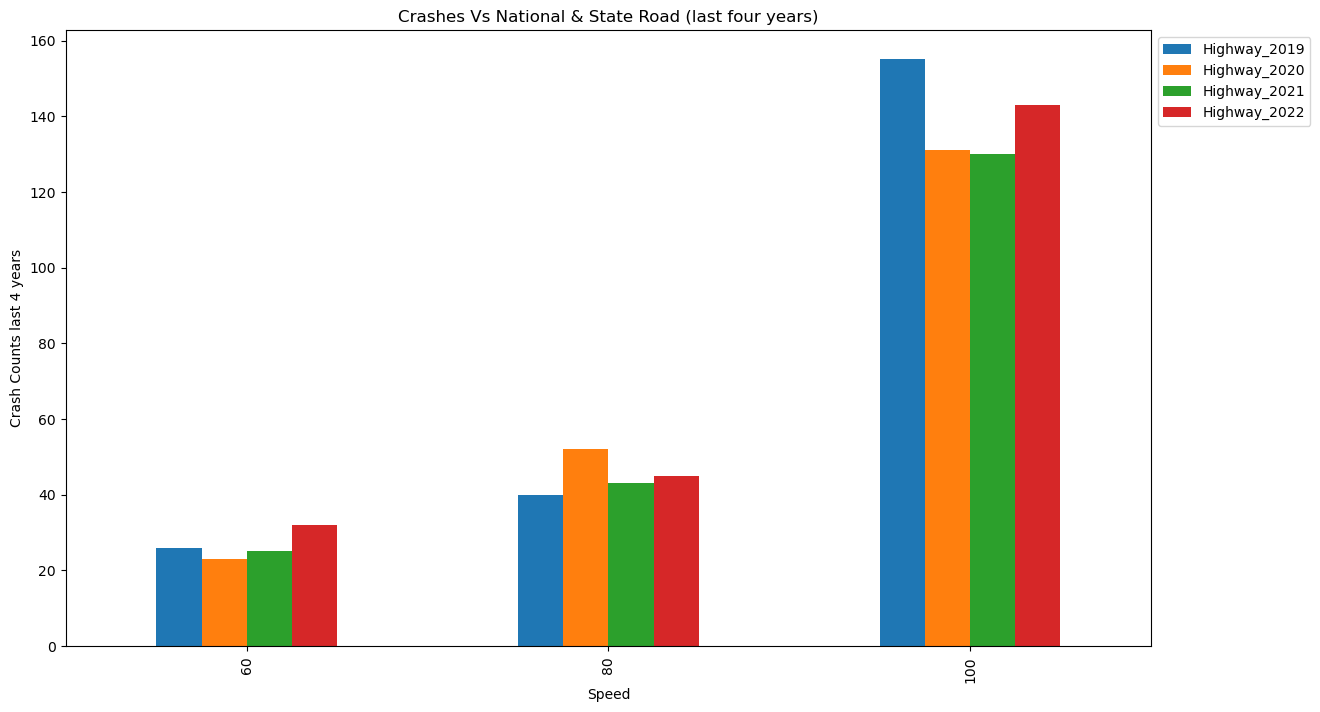

In [20]:

df_hw_last4years.plot(x="Speed Limit",y=['Highway_2019','Highway_2020','Highway_2021','Highway_2022'],kind='bar',figsize=(14,8))
plt.title("Crashes Vs National & State Road (last four years)")
plt.xlabel("Speed")
plt.ylabel("Crash Counts last 4 years")
plt.legend(bbox_to_anchor=(1.0, 1.0),loc="best")
plt.show()

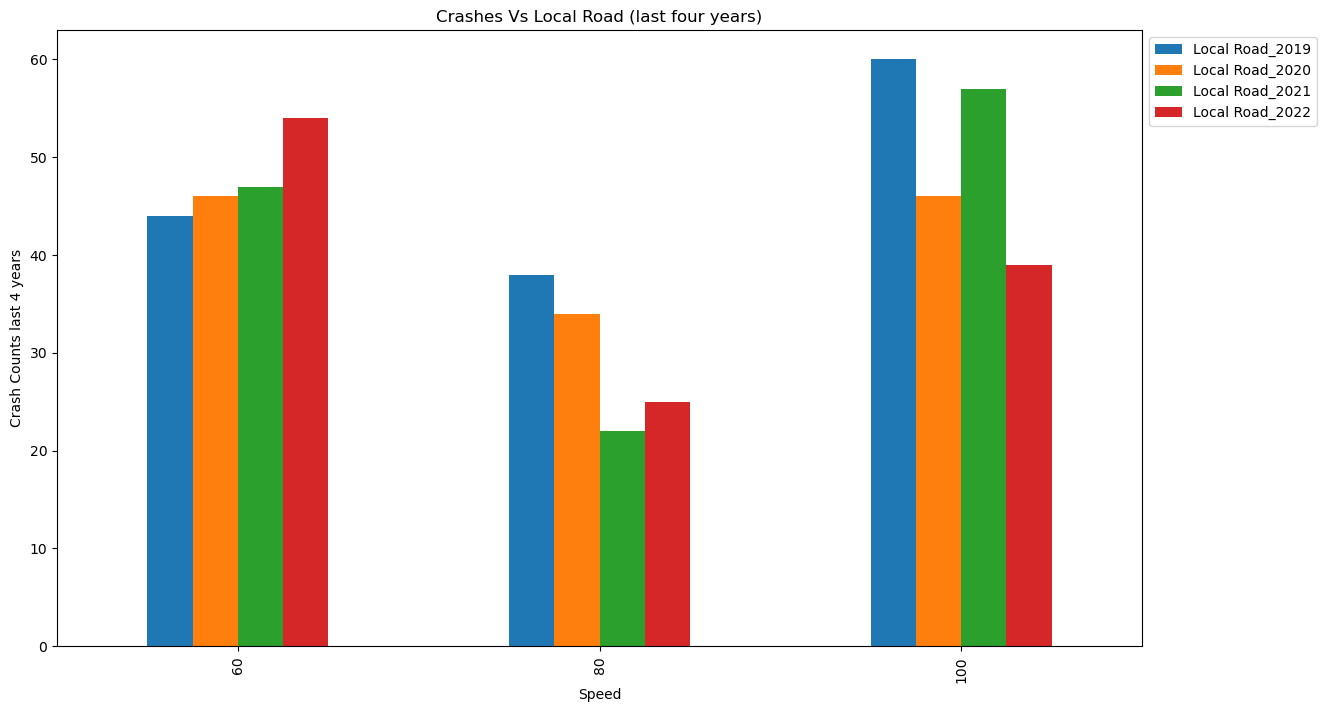

In [21]:

df_localroad_last4years.plot(x="Speed Limit",y=['Local Road_2019','Local Road_2020','Local Road_2021','Local Road_2022'],kind='bar',figsize=(14,8))
plt.title("Crashes Vs Local Road (last four years)")
plt.xlabel("Speed")
plt.ylabel("Crash Counts last 4 years")
plt.legend(bbox_to_anchor=(1.0, 1.0),loc="best")
plt.show()